## 3.1. Regresja liniowa wielu zmiennych

We can use more than one feature of $x$ to predict the value of $y$:

### Przykład – ceny mieszkań

In [1]:
import numpy as np
import pandas as pd

data = pd.read_csv("data_flats_train.tsv", sep="\t")
data.rename(
    columns={
        col: f"x{i}:{col}" if i > 0 else f"y:{col}"
        for i, col in enumerate(data.columns)
    },
    inplace=True,
)
data.index = np.arange(1, len(data) + 1)

In [2]:
print(data)

       y:price  x1:isNew  x2:rooms  x3:floor   x4:location  x5:sqrMetres
1     476118.0     False         3         1       Centrum            78
2     459531.0     False         3         2        Sołacz            62
3     411557.0     False         3         0        Sołacz            15
4     496416.0     False         4         0        Sołacz            14
5     406032.0     False         3         0        Sołacz            15
...        ...       ...       ...       ...           ...           ...
1335  349000.0     False         4         0  Szczepankowo            29
1336  399000.0     False         5         0  Szczepankowo            68
1337  234000.0      True         2         7         Wilda            50
1338  210000.0      True         2         1         Wilda            65
1339  279000.0      True         2         2        Łazarz            36

[1339 rows x 6 columns]


$$ x^{(2)} = ({\rm "False"}, 3, 2, {\rm "Sołacz"}, 62), \quad x_3^{(2)} = 2 $$

### Hypothesis

In our case (we chose 5 features):

$$ h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \theta_4 x_4 + \theta_5 x_5 $$

In general ($n$ features):

$$ h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \ ldots + \theta_n x_n $$

If we define $x_0 = 1$, we can write the above formula in a more compact way:

$$
\begin{array}{rcl}
h_\theta (x)
 & = & \theta_0 x_0 + \theta_1 x_1 + \theta_2 x_2 + \ldots + \theta_n x_n \\
 & = & \displaystyle \sum_{i=0}^{n} \theta_i x_i \\
 & = & \theta^T \, x \\
 & = & x^T \, \theta \\
\end{array}
$$

($x$ is a single example from the learner's set.)

### Simple gradient method-matrix notation

The simple gradient method will take a very elegant form if we use vectors and matrices to write it.

$$
X=\left[\begin{array}{cc}
1 & \left( \vec x^{(1)} \right)^T \\
1 & \left( \vec x^{(2)} \right)^T \\
\vdots & \vdots\\
1 & \left( \vec x^{(m)} \right)^T \\
\end{array}\right] 
= \left[\begin{array}{cccc}
1 & x_1^{(1)} & \cdots & x_n^{(1)} \\
1 & x_1^{(2)} & \cdots & x_n^{(2)} \\
\vdots & \vdots & \ddots & \vdots\\
1 & x_1^{(m)} & \cdots & x_n^{(m)} \\
\end{array}\right]
\quad
\vec{y} = 
\left[\begin{array}{c}
y^{(1)}\\
y^{(2)}\\
\vdots\\
y^{(m)}\\
\end{array}\right]
\quad
\theta = \left[\begin{array}{c}
\theta_0\\
\theta_1\\
\vdots\\
\theta_n\\
\end{array}\right]
$$

$$h_\theta (X) = X \theta$$

($X$ is a matrix representing the characteristics of all the examples in the learner's set.)

In [3]:
# Loading data from a file-linear regression of many variables-Matrix notation

import pandas as pd

data = pd.read_csv(
    "data_flats_train.tsv",
    delimiter="\t",
    usecols=["price", "rooms", "floor", "sqrMetres"],
)
m, n_plus_1 = data.values.shape
n = n_plus_1 - 1
Xn = data.values[:, 1:].reshape(m, n)

# Add a column of ones to The Matrix
X = np.matrix(np.concatenate((np.ones((m, 1)), Xn), axis=1)).reshape(m, n_plus_1)
y = np.matrix(data.values[:, 0]).reshape(m, 1)

print(f"{X[:5]=}")
print(f"{X.shape=}")
print(f"{y[:5]=}")
print(f"{y.shape=}")


X[:5]=matrix([[ 1.,  3.,  1., 78.],
        [ 1.,  3.,  2., 62.],
        [ 1.,  3.,  0., 15.],
        [ 1.,  4.,  0., 14.],
        [ 1.,  3.,  0., 15.]])
X.shape=(1339, 4)
y[:5]=matrix([[476118.],
        [459531.],
        [411557.],
        [496416.],
        [406032.]])
y.shape=(1339, 1)


### Loss function - Matrix notation

$$J(\theta)=\dfrac{1}{2|\vec y|}\left(X\theta-\vec{y}\right)^T\left(X\theta-\vec{y}\right)$$ 


In [4]:
from IPython.display import display, Math, Latex


def J(theta, X, y):
    """Matrix version of the loss function"""
    m = len(y)
    cost = 1.0 / (2.0 * m) * ((X * theta - y).T * (X * theta - y))
    return cost.item()

### Gradient - Matrix notation

$$\nabla J(\theta) = \frac{1}{|\vec y|} X^T\left(X\theta-\vec y\right)$$

In [5]:
def dJ(theta, X, y):
    """Loss gradient Matrix version"""
    return 1.0 / len(y) * (X.T * (X * theta - y))

### Simple gradient algorithm - Matrix notation

$$ \theta := \theta - \alpha \, \nabla J(\theta) $$

In [6]:
def gradient_descent(fJ, fdJ, theta, X, y, alpha, eps):
    """Simple gradient algorithm implementation using numpy and matrices"""
    current_cost = fJ(theta, X, y)
    history = [[current_cost, theta]]
    while True:
        theta = theta - alpha * fdJ(theta, X, y)  # implementacja wzoru
        current_cost, prev_cost = fJ(theta, X, y), current_cost
        if abs(prev_cost - current_cost) <= eps:
            break
        if current_cost > prev_cost:
            print("The step length (alpha) is too long!")
            break
        history.append([current_cost, theta])
    return theta, history

In [7]:
theta_start = np.zeros((n + 1, 1))

# We change the values of alpha (step size) and eps (stop criterion)
theta_best, history = gradient_descent(J, dJ, theta_start, X, y, alpha=0.0001, eps=0.1)

In [8]:
print(theta_best)

[[17446.21350244]
 [86476.7960408 ]
 [-1374.89500924]
 [ 2165.06890726]]


## 3.2. Simple gradient method in practice

### Stop criterion

A simple gradient algorithm involves performing certain steps in a loop. The question is: when should I stop doing this loop?

With each iteration, the value of the loss function decreases by a smaller value.
The parameter ' eps` determines what limit value of this difference is sufficient for us:

 * The lower the `eps ' value, the more accurate the result, but the longer the algorithm runs.
 * The higher the `eps ' value, the shorter the running time of the algorithm, but the less accurate the result.

On the graph we will see a comparison of the regression for different values of ' eps`

In [9]:
theta_start = np.zeros((n + 1, 1))

epss = [10.0**n for n in range(-1, 5)]
costs = []
lengths = []
for eps in epss:
    theta_best, history = gradient_descent(
        J, dJ, theta_start, X, y, alpha=0.0001, eps=eps
    )
    cost = history[-1][0]
    steps = len(history)
    print(f"{eps=:7},  {cost=:15.3f},  {steps=:6}")
    costs.append(cost)
    lengths.append(steps)

eps=    0.1,  cost=10324864803.159,  steps=374575
eps=    1.0,  cost=10324942127.799,  steps=176746
eps=   10.0,  cost=10325220747.014,  steps= 60389
eps=  100.0,  cost=10325742602.406,  steps= 46184
eps= 1000.0,  cost=10330453738.393,  steps= 34059
eps=10000.0,  cost=10377076139.727,  steps= 22123


In [10]:
import matplotlib.pyplot as plt

def eps_cost_steps_plot(eps, costs, steps):
    """Graph of loss and number of steps depending on eps"""
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax1.plot(eps, steps, "--s", color="green")
    ax2.plot(eps, costs, ":o", color="orange")
    ax1.set_xscale("log")
    ax1.set_xlabel("eps")
    ax1.set_ylabel("liczba kroków", color="green")
    ax2.set_ylabel("koszt", color="orange")
    plt.show()


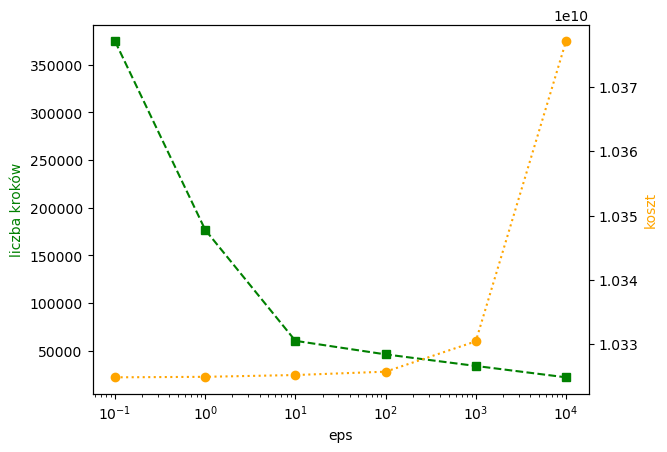

In [11]:
eps_cost_steps_plot(epss, costs, lengths)

### Step length ($\alpha$)

In [12]:
import ipywidgets as widgets

# How the loss changes in the next steps depending on Alpha


def costchangeplot(history, return_fig=False):
    fig = plt.figure(figsize=(16 * 0.6, 9 * 0.6))
    ax = fig.add_subplot(111)
    fig.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)
    ax.set_xlabel("krok")
    ax.set_ylabel(r"$J(\theta)$")

    X = np.arange(0, 500, 1)
    Y = [history[step][0] for step in X]
    ax.plot(X, Y, linewidth="2", label=(r"$J(\theta)$"))
    if return_fig:
        return fig


def slide7(alpha):
    theta_best, history = gradient_descent(
        J, dJ, theta_start, X, y, alpha=0.0001, eps=0.1
    )
    fig = costchangeplot(history, return_fig=True)
    


sliderAlpha1 = widgets.FloatSlider(
    min=0.01, max=0.03, step=0.001, value=0.02, description=r"$\alpha$", width=300
)


In [13]:
widgets.interact_manual(slide7, alpha=sliderAlpha1)

interactive(children=(FloatSlider(value=0.02, description='$\\alpha$', max=0.03, min=0.01, step=0.001), Button…

<function __main__.slide7(alpha)>

## 3.3. Data normalization

Data normalization is a process that involves adjusting the input data in such a way as to facilitate the operation of a simple gradient algorithm.

Let me explain this with an example.

Consider the model $h(x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3$, in which the price of an apartment is predicted based on the number of rooms $x_1$, floor $x_2$ and square footage $x_3$:

In [14]:
# The data we read at the beginning of the lecture
print(data)

         price  rooms  floor  sqrMetres
0     476118.0      3      1         78
1     459531.0      3      2         62
2     411557.0      3      0         15
3     496416.0      4      0         14
4     406032.0      3      0         15
...        ...    ...    ...        ...
1334  349000.0      4      0         29
1335  399000.0      5      0         68
1336  234000.0      2      7         50
1337  210000.0      2      1         65
1338  279000.0      2      2         36

[1339 rows x 4 columns]


In [15]:
def show_mins_and_maxs(X):
    # The data we read at the beginning of the lecture
    mins = np.amin(X, axis=0).tolist()[0]  # wartości minimalne
    maxs = np.amax(X, axis=0).tolist()[0]  # wartości maksymalne
    for i, (xmin, xmax) in enumerate(zip(mins, maxs)):
        display(Math(r"${:.2F} \leq x_{} \leq {:.2F}$".format(xmin, i, xmax)))


In [16]:
show_mins_and_maxs(X)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

The characteristics of the student's data take values from:

For this reason, the graph of the loss function is very "flattened" along one of the axes:

In [17]:
def contour_plot(X, y):
    theta0_vals = np.linspace(-1e7, 1e7, 100)
    theta1_vals = np.linspace(-1e7, 1e7, 100)

    J_vals = np.zeros(shape=(theta0_vals.size, theta1_vals.size))
    for t1, element in enumerate(theta0_vals):
        for t2, element2 in enumerate(theta1_vals):
            thetaT = np.matrix([1.0, element, element2]).reshape(3, 1)
            J_vals[t1, t2] = J(thetaT, X, y)

    plt.figure()
    plt.contour(theta0_vals, theta1_vals, J_vals.T, levels=20)
    plt.xlabel(r"$\theta_0$")
    plt.ylabel(r"$\theta_1$")


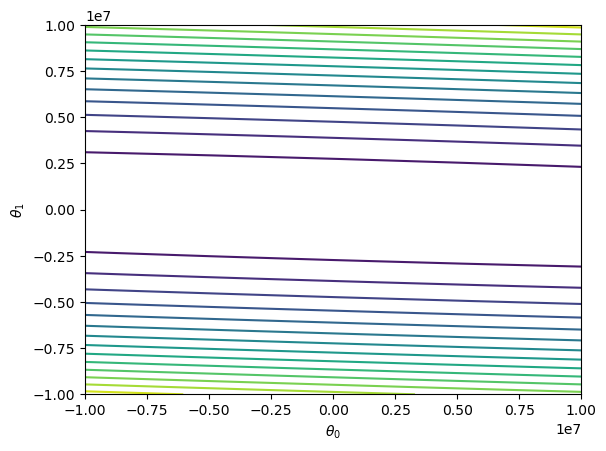

In [18]:
contour_plot(
    X[:, [0, 2, 3]], y
)  # We choose features [0, 2, 3], because more can not be seen on the flat on the graph

If the loss function is shaped as in the graph above, it is easy to imagine that finding a local minimum using the simple gradient method must be quite a challenge: the algorithm will quickly find the "gutter", but the "descent" along the "gutter" in search of the minimum will be very slow.

In [19]:
theta_start = np.zeros((n + 1, 1))
theta_best, history = gradient_descent(J, dJ, theta_start, X, y, alpha=0.0001, eps=0.1)
print(f"Number of steps: {len(history)}")
print(f"Loss: {history[-1][0]}")

Number of steps: 374575
Loss: 10324864803.159063


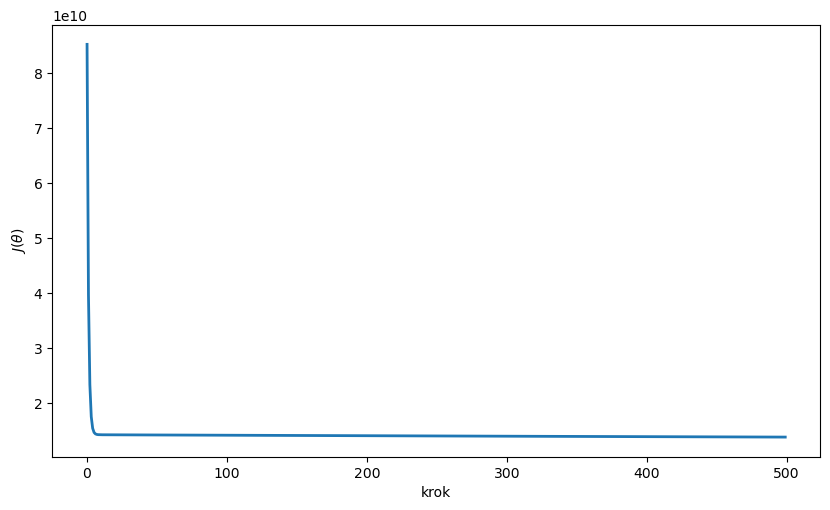

In [20]:
costchangeplot(history)


How do you deal with that?

We will try to transform the data so that the cost function has a "nice" regular shape

### Scaling

We will strive to ensure that each of the characteristics adopts values to a similar extent.

To do this, we scale the values of each of the characteristics, dividing them by the maximum value:

$$ \hat{x_i}^{(j)}: = \frac{x_i^{(j)}}{\max_j x_i^{(j)}} $$

In [21]:
X_scaled = X / np.amax(X, axis=0)

show_mins_and_maxs(X_scaled)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

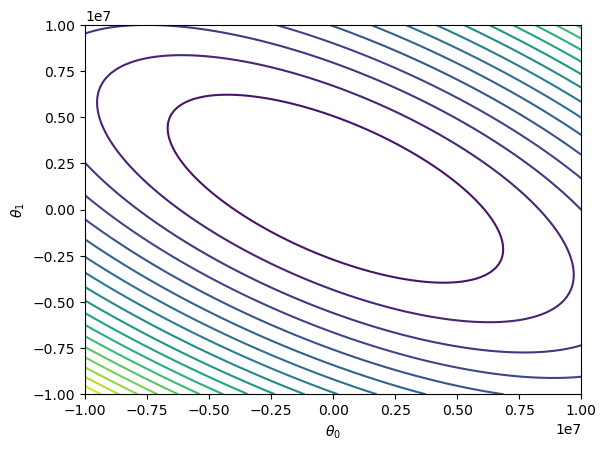

In [22]:
contour_plot(X_scaled[:, [0, 2, 3]], y)

Now we can use a longer step length $\alpha$, so the algorithm will find a solution faster.

In [23]:
theta_start = np.zeros((n + 1, 1))
theta_best, history = gradient_descent(
    J, dJ, theta_start, X_scaled, y, alpha=0.01, eps=0.1
)
print(f"Number of steps: {len(history)}")
print(f"Loss: {history[-1][0]}")

Number of steps: 82456
Loss: 10324856880.491594


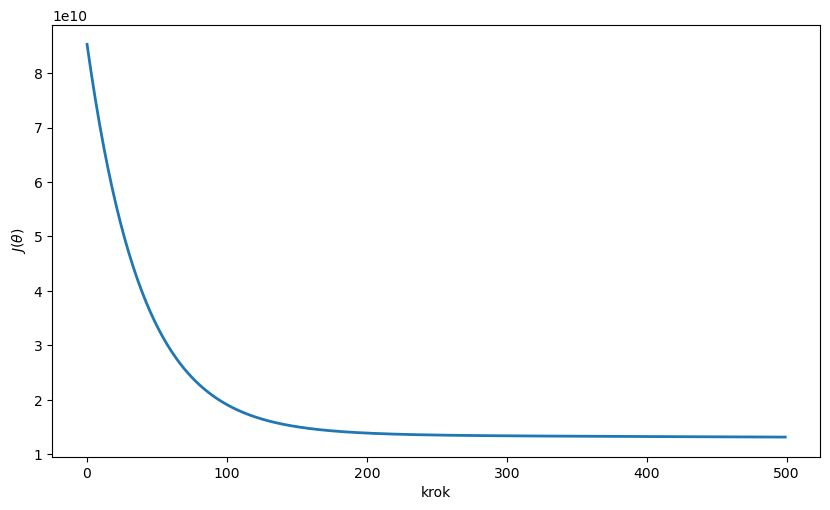

In [24]:
costchangeplot(history)

## Normalization of the average

We will try to ensure that the average value of each of the features is around $0$.

To do this, in addition to scaling, we will subtract the average value from the value of each of the features:

$$ \hat{x_i}^{(j)}: = \frac{x_i^{(j)} - \mu_i}{\max_j x_i^{(j)}} $$

In [25]:
X_normalized = (X - np.mean(X, axis=0)) / np.amax(X, axis=0)

show_mins_and_maxs(X_normalized)

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

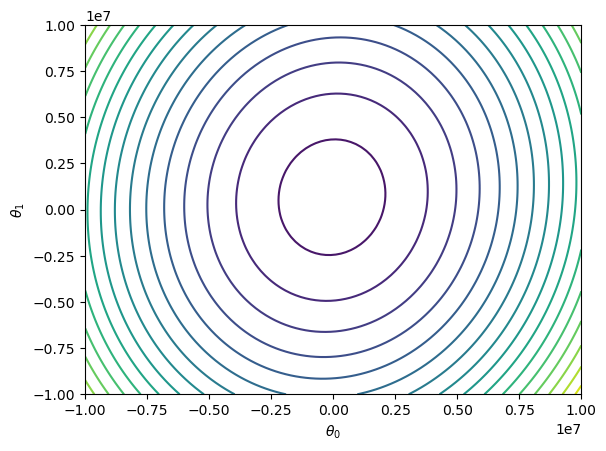

In [26]:
contour_plot(X_normalized[:, [0, 2, 3]], y)

Now the loss function has a graph with a very regular shape – the simple gradient algorithm used in this case will very quickly find the minimum of the loss function.

In [27]:
theta_start = np.zeros((n + 1, 1))
theta_best, history = gradient_descent(
    J, dJ, theta_start, X_normalized, y, alpha=0.1, eps=0.1
)
print(f"Number of steps: {len(history)}")
print(f"Loss+-: {history[-1][0]}")

Number of steps: 9511
Loss+-: 80221516127.09409


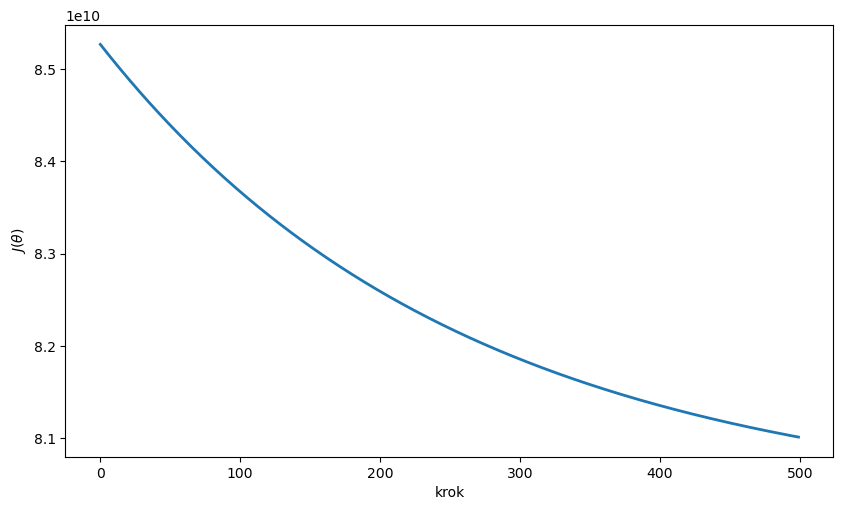

In [28]:
costchangeplot(history)